# Glass

## reference

In [163]:
# https://www.kaggle.com/datasets/uciml/glass/code

# Attribute Information:

#     Id number: 1 to 214 (removed from CSV file)
#     RI: refractive index
#     Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
#     Mg: Magnesium
#     Al: Aluminum
#     Si: Silicon
#     K: Potassium
#     Ca: Calcium
#     Ba: Barium
#     Fe: Iron
#     Type of glass: (class attribute)
#     -- 1 building_windows_float_processed
#     -- 2 building_windows_non_float_processed
#     -- 3 vehicle_windows_float_processed
#     -- 4 vehicle_windows_non_float_processed (none in this database)
#     -- 5 containers
#     -- 6 tableware
#     -- 7 headlamps


## Import Libraries

In [164]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample 
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## Import Dataset

In [165]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/glass.csv'
glass = pd.read_csv(path)
glass.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [166]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


## check target labels distribution

In [167]:
num_type = glass.Type.value_counts()
num_type

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## resample 

In [168]:
glass_2 = glass.copy()
# find the max number of type of target 
num_max = glass.Type.value_counts().max()
# find how many samples do we have to add for each type 
add_num = num_max - num_type
add_num = add_num.sort_index()
# find the sample for each type
for i in add_num.index:
  cond = glass.Type == i
  sample_i = glass[cond]
  # resample from sample for type
  upsample = resample(sample_i, replace = True, n_samples = add_num[i])
  # join the two data together
  glass_2 = pd.concat([glass_2, upsample], axis = 0)
glass_2

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
187,188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
187,188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
189,190,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
206,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7


## remove some data which is not important 

In [169]:
glass_3 = glass_2.copy()
glass_3 = glass_4 = glass_3.drop(columns = 'ID')

## standardize 

In [170]:
st = StandardScaler()
glass_3 = st.fit_transform(glass_3)
glass_3 = pd.DataFrame(data = glass_3, index = glass_4.index, columns = glass_4.columns)
glass_3['Type'] = glass_4['Type']
glass_3

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.985449,0.014616,1.519194,-0.759206,-1.057793,-0.461492,-0.218454,-0.393272,-0.449622,1
1,-0.160365,0.258930,0.947568,-0.302828,0.013177,-0.056929,-0.843939,-0.393272,-0.449622,1
2,-0.642281,-0.092882,0.915454,0.013126,0.306284,-0.143621,-0.877933,-0.393272,-0.449622,1
3,-0.143515,-0.405603,1.005373,-0.425699,-0.122103,0.029763,-0.578788,-0.393272,-0.449622,1
4,-0.224396,-0.346968,0.960414,-0.513464,0.407745,0.010499,-0.680769,-0.393272,-0.449622,1
...,...,...,...,...,...,...,...,...,...,...
187,1.706638,-0.180835,0.780576,-0.531017,-0.381391,0.058661,-0.164064,-0.393272,-0.449622,7
187,1.706638,-0.180835,0.780576,-0.531017,-0.381391,0.058661,-0.164064,-0.393272,-0.449622,7
189,1.875140,2.115713,-0.189260,-0.390593,-2.579697,-0.220681,-0.313637,2.624942,-0.449622,7
206,-0.551290,1.285047,-1.364625,0.592375,0.441565,-0.519287,-0.272844,2.085975,-0.449622,7


## Visualize the Data

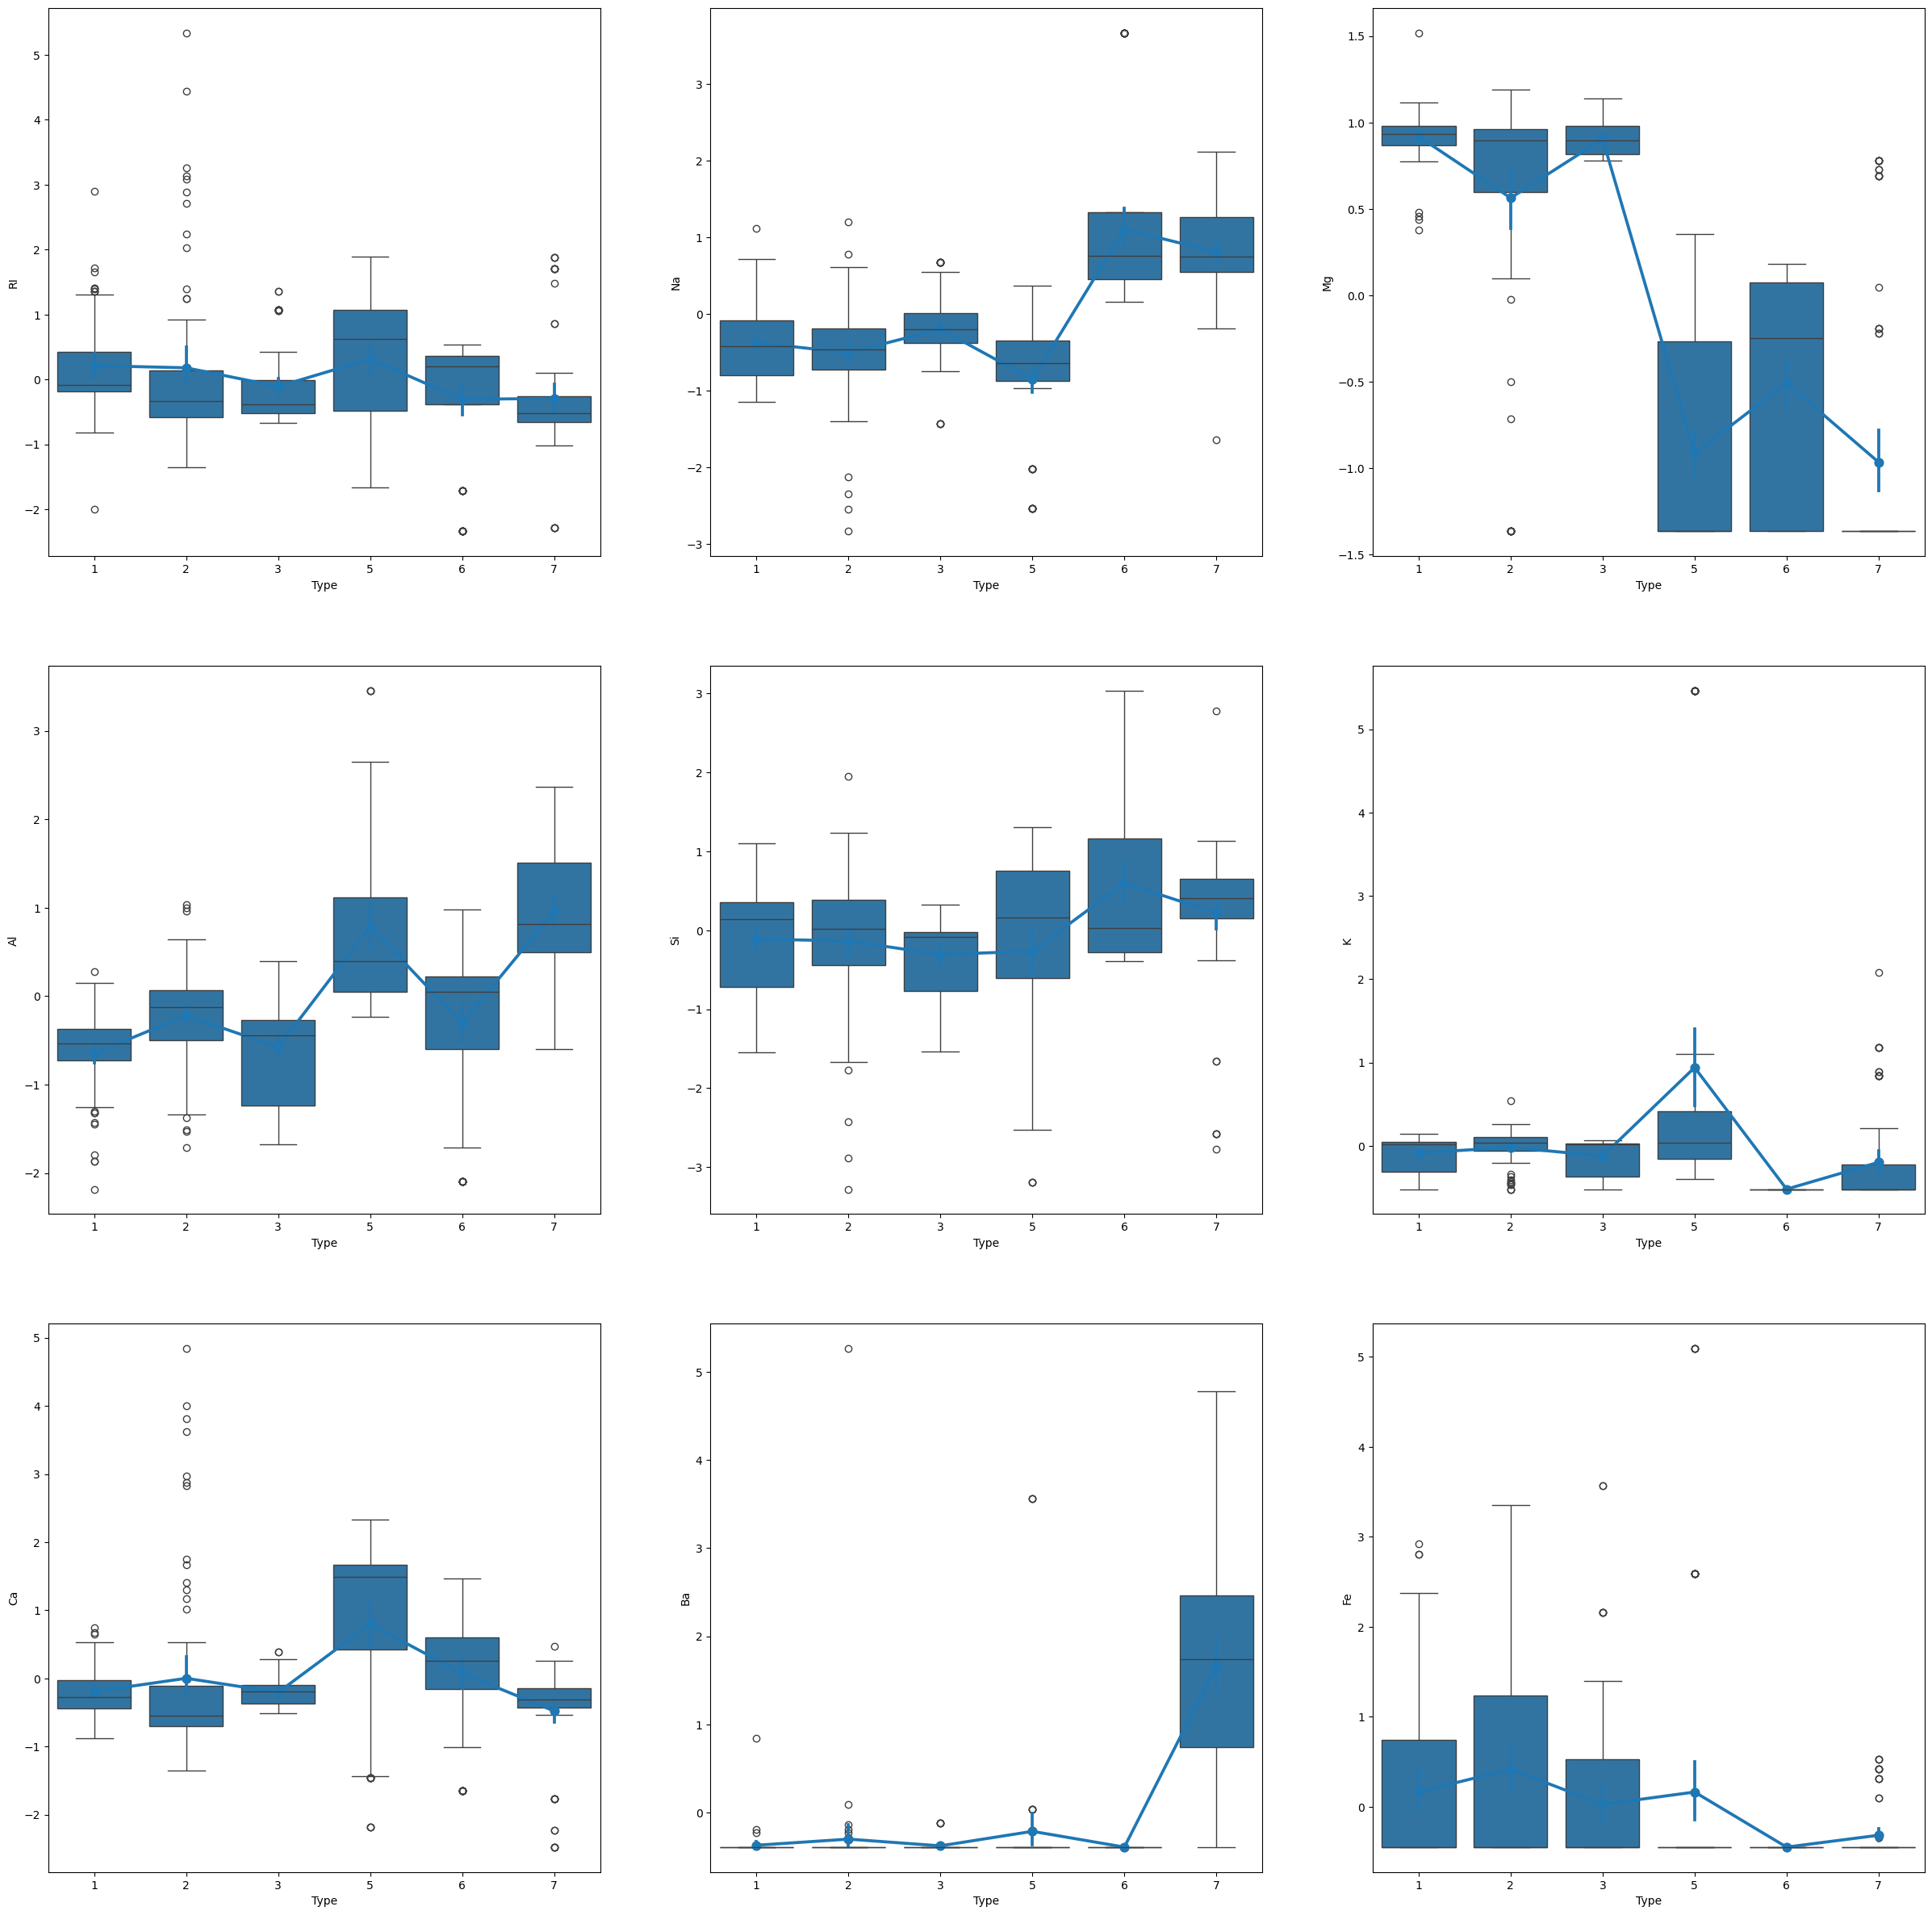

In [171]:
fig, ax = plt.subplots(nrows = 3, ncols =3, figsize = (30,30))
ax = np.ravel(ax)
for i in range(0,9):
  sns.boxplot(ax = ax[i], data = glass_3, y = glass_3.columns.values[i], x = 'Type')
  sns.pointplot(ax = ax[i], data = glass_3, y = glass_3.columns.values[i], x = 'Type')
plt.show()



In [172]:
# predict that mg, aj is important

## Split features and targets

In [173]:
cond = glass_3.columns == 'Type'
y = glass_3.Type
full_feature = glass_3.columns[~cond]
X = glass_3[full_feature]

## Split the data into training and tese

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Feature Selection

In [175]:
# using f_classif and selecKbest to select feature
fu = f_classif
model = SelectKBest(score_func = fu, k = 5)
model.fit_transform(X_train, y_train)

# setup a dataframe which show each feature importance
score = model.scores_
features = model.feature_names_in_
feature_score = pd.DataFrame({'features': features, 'score': score}).sort_values(by = 'score', ascending = False).reset_index(drop = True, inplace = False)
feature_score = feature_score[:5]
feature_score
# import features
m_feature = feature_score.features.values


In [176]:
# get the new data which is composed by important features
X_train = X_train[m_feature]
X_test = X_test[m_feature]

## Logistic Regression, Decision Trees, support vector machine

In [200]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()  ## result is good  
sv = SVC()
rd = RandomForestClassifier() ## result is the best  
estimators = [ ('dt', dt), ('rd', rd)]

## Majority Votting

In [201]:
mv = VotingClassifier(estimators = estimators, voting = 'hard')
mv.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rd', RandomForestClassifier())])

In [202]:
# predict the results 
y_pred = mv.predict(X_test)

## confusion matrix

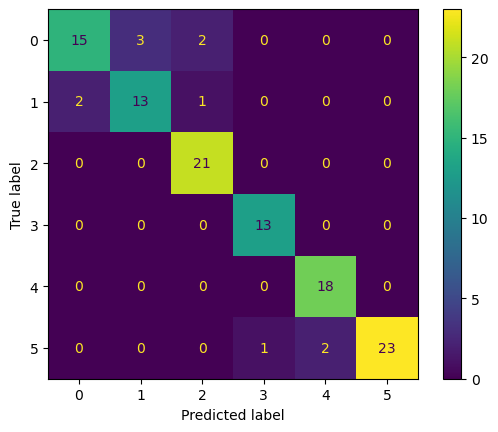

In [203]:
cm = confusion_matrix(y_test, y_pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()
plt.show()

## Accuracy

In [204]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.75      0.81        20
           2       0.81      0.81      0.81        16
           3       0.88      1.00      0.93        21
           5       0.93      1.00      0.96        13
           6       0.90      1.00      0.95        18
           7       1.00      0.88      0.94        26

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114

